In [1]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt

os.chdir("../")
from epitools import get_data

In [2]:
## Peru
gdf_pe = gpd.read_file("https://raw.githubusercontent.com/juaneladio/peru-geojson/master/peru_departamental_simple.geojson")
gdf_pe = gdf_pe.rename(columns={"NOMBDEP": "region"})

df_pe = get_data(
    country="Peru",
    year=2021,
    aggregation="region",
    election="first_round",
    method="nv"
)

data_pe = pd.merge(gdf_pe, df_pe, on="region")
data_pe["country"] = "Peru"

In [3]:
## Chile
gdf_cl = gpd.read_file("geo_shapes/Chile_region.geojson")
gdf_cl = gdf_cl.rename(columns={"codregion": "region_id"})

df_cl = get_data(
    country="Chile",
    year=2021,
    aggregation="region_id",
    election="first_round",
    method="nv"
)
df_cl["region_id"] = df_cl["region_id"].astype(int)

data_cl = pd.merge(gdf_cl, df_cl, on="region_id")
data_cl["country"] = "Chile"

In [4]:
gdf_ar = gpd.read_file("https://raw.githubusercontent.com/deldersveld/topojson/master/countries/argentina/argentina-provinces.json")
gdf_ar = gdf_ar[["ID_1", "NAME_1", "geometry"]].rename(columns={"ID_1": "district_id"})

df_ar = get_data(
    country="Argentina",
    year=2019,
    aggregation="district_id",
    election="first_round",
    method="nv"
)
df_ar["district_id"] = df_ar["district_id"].astype(int)
data_ar = pd.merge(gdf_ar, df_ar, on="district_id")
data_ar["country"] = "Argentina"

In [5]:
gdf_br = gpd.read_file("https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/brazil-states.geojson")
gdf_br = gdf_br.rename(columns={"sigla": "region_id"})

df_br = get_data(
    country="Brazil",
    year=2022,
    aggregation="region_id",
    election="first_round",
    method="nv"
)
data_br = pd.merge(gdf_br, df_br, on="region_id")
data_br["country"] = "Brazil"

In [6]:
data = pd.concat([data_pe, data_cl, data_ar, data_br])

C:\Users\cnava\AppData\Roaming\Python\Python310\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


In [7]:
output = []
for ii, tmp in data.groupby("country"):
    tmp["within_ep_n"] = (tmp["epi_within"] - tmp["epi_within"].mean()) / tmp["epi_within"].std()
    output.append(tmp)

data = pd.concat(output, ignore_index=True)
data = gpd.GeoDataFrame(data)
data.head()

,region,COUNT,FIRST_IDDP,HECTARES,geometry,epi,epi_between,epi_within,year,country,...,district_id,NAME_1,id,name,regiao_id,codigo_ibg,cartodb_id,created_at,updated_at,within_ep_n
0,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-62.79864 -41.02712, -62.79879...",0.755428,0.651302,0.104126,2019,Argentina,...,1.0,Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaT,NaT,-0.139794
1,NaN,NaN,NaN,NaN,"POLYGON ((-62.12622 -30.47903, -62.12773 -30.4...",0.762476,0.632063,0.130413,2019,Argentina,...,2.0,Córdoba,NaN,NaN,NaN,NaN,NaN,NaT,NaT,0.802727
2,NaN,NaN,NaN,NaN,"POLYGON ((-66.08167 -26.21934, -66.08379 -26.2...",0.745605,0.641057,0.104548,2019,Argentina,...,3.0,Catamarca,NaN,NaN,NaN,NaN,NaN,NaT,NaT,-0.124659
3,NaN,NaN,NaN,NaN,"POLYGON ((-58.36429 -26.86498, -58.36975 -26.8...",0.687886,0.600507,0.087380,2019,Argentina,...,4.0,Chaco,NaN,NaN,NaN,NaN,NaN,NaT,NaT,-0.740191
4,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-66.69878 -45.24380, -66.69878...",0.732187,0.613951,0.118236,2019,Argentina,...,5.0,Chubut,NaN,NaN,NaN,NaN,NaN,NaT,NaT,0.366117


In [8]:
import matplotlib

In [13]:
samerica = gpd.read_file("https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/south-america.geojson")
samerica.head()

,name,cartodb_id,created_at,updated_at,geometry
0,French Guiana (France),1,2013-11-28 06:32:17+01:00,2013-11-28 06:33:02+01:00,"POLYGON ((-52.28892 4.87612, -52.32461 4.77090..."
1,Brazil,33,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-48.48589 -27.76699, -48.55459..."
2,Chile,41,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-67.57519 -55.88965, -67.61143..."
3,Argentina,9,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-64.54917 -54.71621, -64.43882..."
4,Bolivia,32,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"POLYGON ((-58.15977 -20.16465, -58.13994 -19.9..."


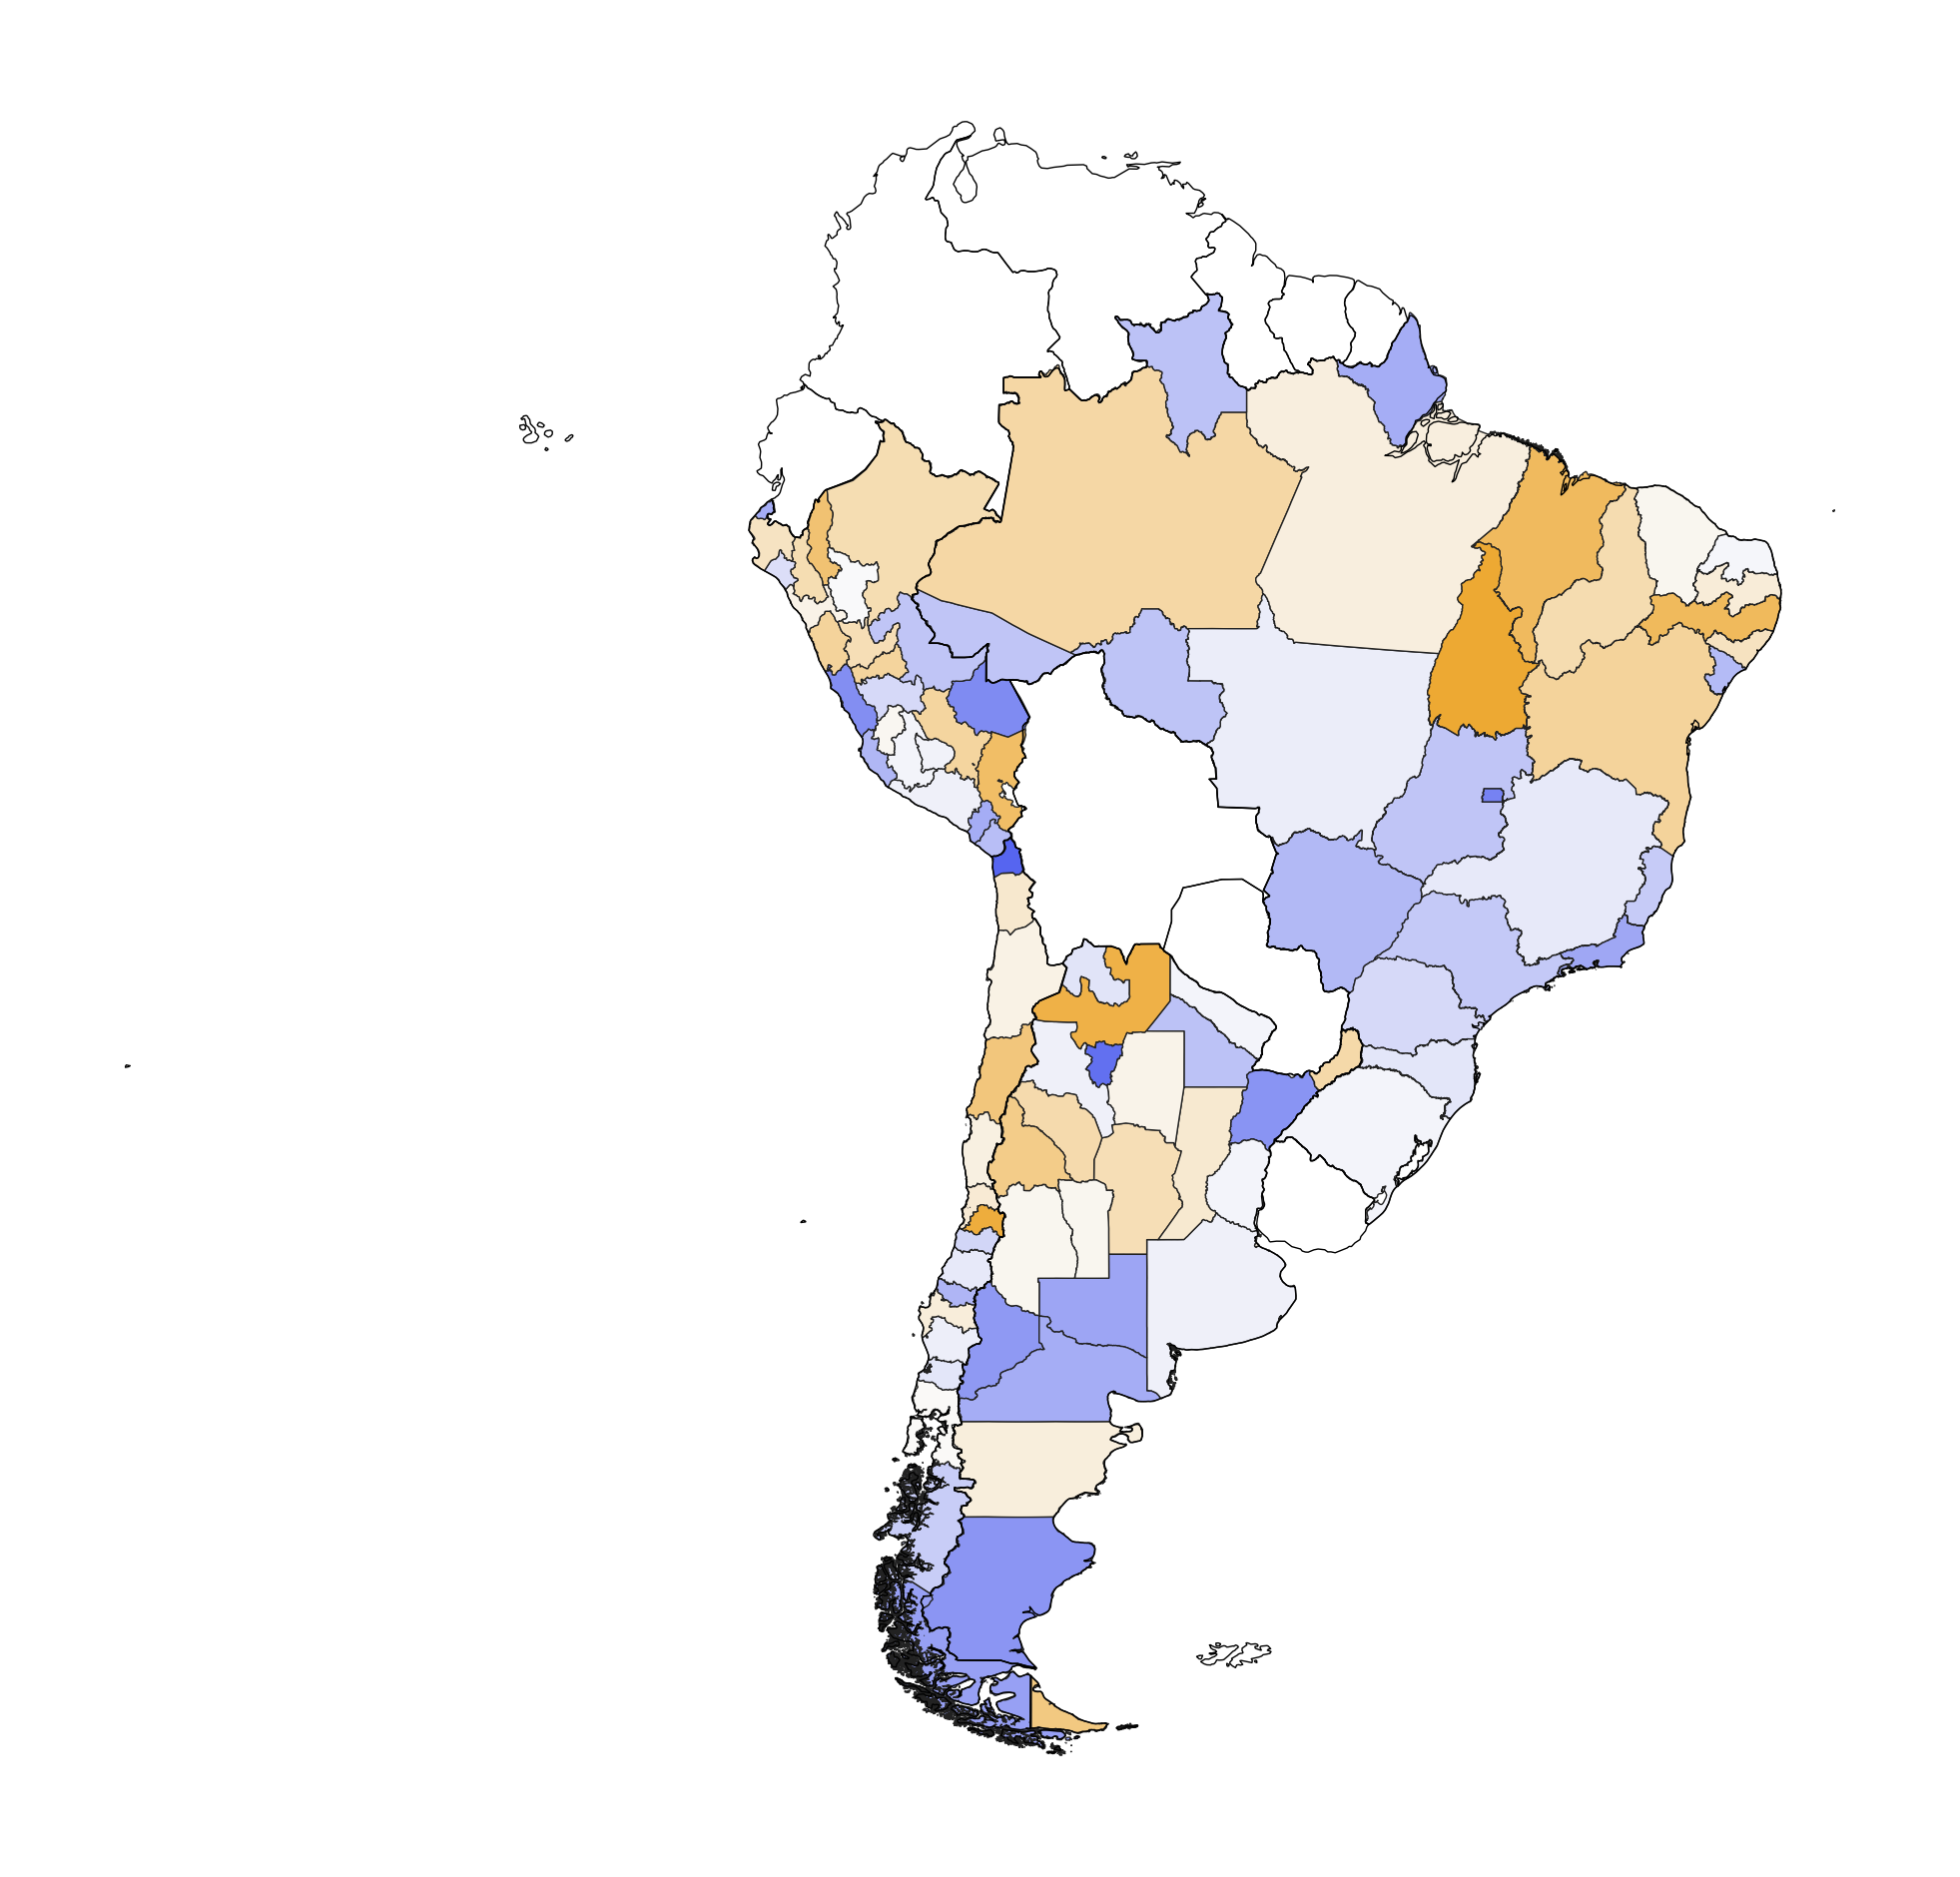

In [16]:
fig, ax = plt.subplots(dpi=400)
norm = plt.Normalize(-3, 3)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#0017EA", "#fafafa", "#EA9400"])

data.plot(
    column="within_ep_n",
    legend=False,
    edgecolor="#222",
    legend_kwds={
        # "location":"bottom",
        "shrink":.25
    },
    # vcenter=0,
    cmap=cmap,
    norm=norm,
    vmin=-2, vmax=2, 
    linewidth=0.25,
    ax=ax
)

samerica.plot(
    ax=ax,
    facecolor="none",
    edgecolor="#000",
    linewidth=0.25
)

ax.axis("off")
fig.tight_layout()